In [6]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot
from Functions.bootstrap import *

In [7]:
np.random.seed(10)


x_train, x_test, y_train, y_test = generateData(250, noise = 0.25)
#500 points give no noticable overfitting
x_train = x_train.flatten(); x_test = x_test.flatten()

n_degrees = 20
poly_degrees = list(range(1, n_degrees+1))
MSEs_train = np.zeros(len(poly_degrees), dtype=float)
MSEs_test = np.zeros(len(poly_degrees), dtype=float)


noIntercept = False


for p in poly_degrees:
    #train model on train data
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    theta = theta_analytic_OLS(X_train, y_train)  
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    y_train_pred = X_train @ theta
    y_test_pred = X_test @ theta

    MSE_train = MSE(y_train, y_train_pred)
    MSE_test = MSE(y_test, y_test_pred)

    MSEs_train[p-1] = MSE_train
    MSEs_test[p-1] = MSE_test



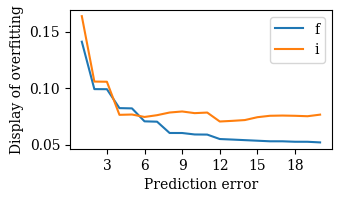

In [10]:
plot(2, poly_degrees, 
     [
         MSEs_train, MSEs_test
     ],
     'figures', 'overfitting', 'Model complexity', 'Prediction error', 'Display of overfitting', x_integer_entries=True, y_integer_entries=False, save=True)

        

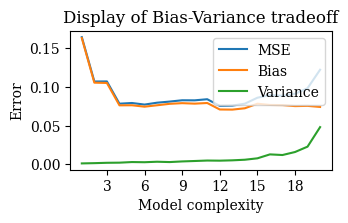

In [11]:
#Show bias-variance tradeoff by resampling using Bootstrap

n_bootstraps = 200
MSEs = np.zeros(len(poly_degrees))
variances = np.zeros(len(poly_degrees))
biases = np.zeros(len(poly_degrees))

for i, p in enumerate(poly_degrees):
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    mse, bias, variance = bootstrap(n_bootstraps, X_train, y_train, X_test, y_test, evaluate_OLS_analytic)
    
    MSEs[i] = mse
    biases[i] = bias
    variances[i] = variance


plot(
    3, poly_degrees, 
    [
        MSEs, biases, variances
    ],
    ['MSE', 'Bias', 'Variance'],
    'figures', 'biasvariancetradeoff', 'Model complexity', 'Error', 'Display of Bias-Variance tradeoff', 
    True, save=True
)

